In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.vision.all import *
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torch
from pathlib import Path

In [3]:
class DataBunch():
    def __init__(self, data_dir, image_size:int = None, batch_size:int = None):
        self.data_dir = data_dir
        self.image_size = image_size
        self.batch_size = batch_size
        
        self.transforms = transforms.Compose([transforms.Resize((self.image_size, self.image_size)),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                                                   std = [0.229, 0.224, 0.225])
                                             ])
        
        self.train_data = datasets.ImageFolder(self.data_dir/'train', transform = self.transforms)
        self.test_data = datasets.ImageFolder(self.data_dir/'test', transform = self.transforms)
        
    @property    
    def train_dataloader(self):
            return DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True, num_workers=2)
    @property    
    def test_dataloader(self):
            return DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False, num_workers=2)

In [4]:
class Net(nn.Sequential):
    def __init__(self):
        super().__init__(
            Flatten(),
            nn.Linear(32*32*3,2048), nn.ReLU(),nn.BatchNorm1d(2048),
            nn.Linear(2048, 1024), nn.ReLU(),nn.BatchNorm1d(1024),
            nn.Linear(1024, 128), nn.ReLU(),nn.BatchNorm1d(128),
            nn.Linear(128, 8), nn.LogSoftmax(dim=1))

In [8]:
IMG_SIZE = 32
BATCH_SIZE = 128
LR = 5e-3
NUM_EPOCHS = 10
DATA_PATH = Path('/home/adityassrana/datatmp/Datasets/MIT_split')

MITdata = DataBunch(DATA_PATH, image_size=IMG_SIZE, batch_size=BATCH_SIZE)

data = DataLoaders(MITdata.train_dataloader, MITdata.test_dataloader).cuda()

learn = Learner(data, Net(), loss_func=F.nll_loss, opt_func=Adam, metrics=accuracy,cbs = [CudaCallback])

In [9]:
learn.fit_one_cycle(NUM_EPOCHS, LR)

epoch,train_loss,valid_loss,accuracy,time
0,1.485512,1.494422,0.472119,00:02
1,1.300565,1.483948,0.551425,00:02
2,1.158681,1.327835,0.581165,00:02
3,1.023845,1.363829,0.581165,00:02
4,0.894629,1.253614,0.594796,00:02
5,0.755485,1.241210,0.617100,00:02
6,0.625952,1.282246,0.623296,00:02
7,0.502928,1.188349,0.638166,00:02
8,0.397711,1.191805,0.657993,00:02
9,0.315242,1.184685,0.659232,00:02


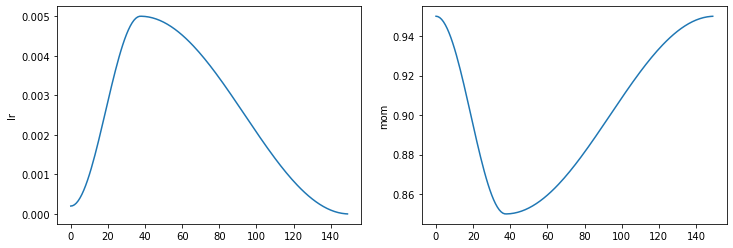

In [10]:
learn.recorder.plot_sched()

In [11]:
learn.save('good_model')

Path('models/good_model.pth')